<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [5]:
df.isnull().sum()

price       0
feature1    0
feature2    0
dtype: int64

In [6]:
df.isna().sum()

price       0
feature1    0
feature2    0
dtype: int64

### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

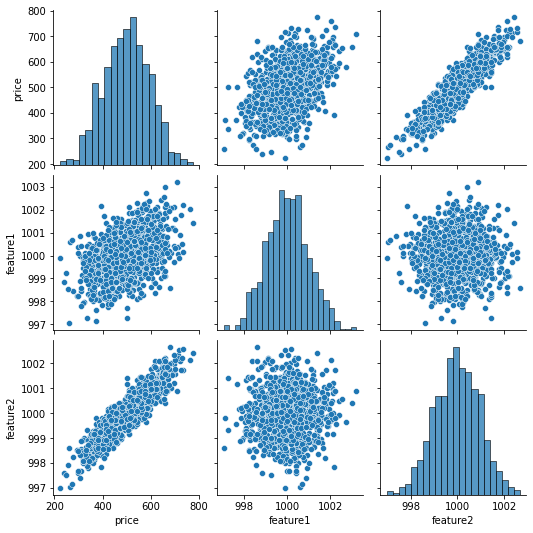

In [7]:
sns.pairplot(df);

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [8]:
df.head(2)

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403


## Keras accepts Numpy array instead of Pandas Datafram, so weed need to change it first.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1', 'feature2']].values

# Label
y = df['price'].values

In [11]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [12]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# quickly check the size
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [16]:
scaler = MinMaxScaler()

At the stage of scaler fitting on training set, it basically calculate for the required values.
Example for MinMaxSclaer, it needs std,min, max etc.. So It calculates those values based on training set at this point.

In [19]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [17]:
scaler.fit(X_train) 

MinMaxScaler()

In [18]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

Now we can see that values are scaled.

In [19]:
X_train.min(), X_train.max()

(996.9956509692493, 1003.2079336486612)

In [20]:
scaled_X_train.min(), scaled_X_train.max()

(0.0, 1.0)

---------

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequentia

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [25]:
model = Sequential([
    Dense(units=4, activation='relu'),
    Dense(units=2, activation='relu'),
    Dense(units=1)
])

### Model - adding in layers one by one

This is the preferred method.

In [26]:
model = Sequential()

model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1))

Let's go ahead and build a simple model and then compile it by defining our solver

In [27]:
model = Sequential()

# This is based on our problem set and we use use different number of layers.
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

# Final output node for prediction, in this case we are trying to predict the value of rare gem stone which can be 500$ , etc. 
# So basically, the final output will be only 1 Value. Thus, we need 1 node of perceptron on our Final Output Layer.
model.add(Dense(1))

# as our problem is predicting one value, so it is Regression problem. Thus, we use Mean Squre Error as our Loss Function.
model.compile(optimizer='rmsprop', loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

-------

-------

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* **Sample**: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* **Batch**: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* **Epoch**: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [29]:
model.fit(x=scaled_X_train, y=y_train, epochs=250) # in this case, our model is running 250 with training set.

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 255753.2812
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 255405.3281
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 255035.2500
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 254609.8438
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 254123.8594
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 253582.2344
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 252965.6719
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 252275.3438
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 251507.9844
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 250652.7031
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 249713.1719
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 525.2651
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 501.7216
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 480.5298
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 458.7299
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 440.9928
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 418.3723
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 401.8722
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 384.3479
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 366.8524
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 348.6816
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - loss: 333.6070
Epoch 108/250
22/22 [==============================] - 0s 2ms/step - loss: 315.4213
Epoch 10

22/22 [==============================] - 0s 2ms/step - loss: 24.4297
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 24.0205
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7849
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5195
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4174
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2610
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 24.6629
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 24.3262
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4992
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 24.0319
Epoch 205/250
22/22 [==============================] - 0s 2ms/step - loss: 24.0732
Epoch 206/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7123
Epoch 207/250
22/2

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [30]:
model.history.history

{'loss': [255753.28125,
  255405.328125,
  255035.25,
  254609.84375,
  254123.859375,
  253582.234375,
  252965.671875,
  252275.34375,
  251507.984375,
  250652.703125,
  249713.171875,
  248674.078125,
  247534.171875,
  246281.53125,
  244922.90625,
  243440.546875,
  241829.375,
  240083.21875,
  238204.484375,
  236185.515625,
  234010.625,
  231679.703125,
  229173.71875,
  226513.21875,
  223688.921875,
  220698.953125,
  217516.65625,
  214123.984375,
  210561.484375,
  206797.328125,
  202837.984375,
  198696.0,
  194330.8125,
  189764.5625,
  184997.046875,
  180056.09375,
  174905.6875,
  169557.09375,
  164006.78125,
  158253.078125,
  152332.0625,
  146237.0,
  139973.984375,
  133565.984375,
  127043.265625,
  120367.7109375,
  113594.3515625,
  106714.9453125,
  99767.84375,
  92799.5625,
  85785.5703125,
  78779.3125,
  71839.921875,
  64940.546875,
  58134.50390625,
  51489.59375,
  45057.859375,
  38848.984375,
  32958.40234375,
  27326.185546875,
  22142.087890625,


In [31]:
model.history.history['loss']

[255753.28125,
 255405.328125,
 255035.25,
 254609.84375,
 254123.859375,
 253582.234375,
 252965.671875,
 252275.34375,
 251507.984375,
 250652.703125,
 249713.171875,
 248674.078125,
 247534.171875,
 246281.53125,
 244922.90625,
 243440.546875,
 241829.375,
 240083.21875,
 238204.484375,
 236185.515625,
 234010.625,
 231679.703125,
 229173.71875,
 226513.21875,
 223688.921875,
 220698.953125,
 217516.65625,
 214123.984375,
 210561.484375,
 206797.328125,
 202837.984375,
 198696.0,
 194330.8125,
 189764.5625,
 184997.046875,
 180056.09375,
 174905.6875,
 169557.09375,
 164006.78125,
 158253.078125,
 152332.0625,
 146237.0,
 139973.984375,
 133565.984375,
 127043.265625,
 120367.7109375,
 113594.3515625,
 106714.9453125,
 99767.84375,
 92799.5625,
 85785.5703125,
 78779.3125,
 71839.921875,
 64940.546875,
 58134.50390625,
 51489.59375,
 45057.859375,
 38848.984375,
 32958.40234375,
 27326.185546875,
 22142.087890625,
 17437.560546875,
 13197.2001953125,
 9531.4150390625,
 6505.50146484

In [32]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss
0,255753.281250
1,255405.328125
2,255035.250000
3,254609.843750
4,254123.859375
...,...
245,24.243357
246,24.545734
247,23.807581
248,24.222528


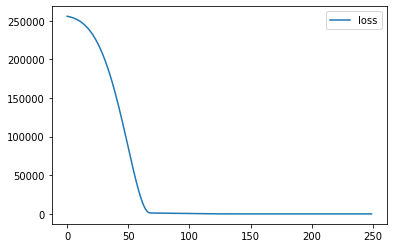

In [33]:
loss_df.plot();

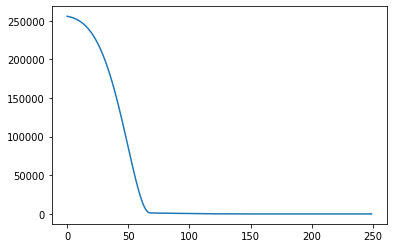

In [34]:
plt.plot(loss_df);

In [35]:
loss = model.history.history['loss']
loss

[255753.28125,
 255405.328125,
 255035.25,
 254609.84375,
 254123.859375,
 253582.234375,
 252965.671875,
 252275.34375,
 251507.984375,
 250652.703125,
 249713.171875,
 248674.078125,
 247534.171875,
 246281.53125,
 244922.90625,
 243440.546875,
 241829.375,
 240083.21875,
 238204.484375,
 236185.515625,
 234010.625,
 231679.703125,
 229173.71875,
 226513.21875,
 223688.921875,
 220698.953125,
 217516.65625,
 214123.984375,
 210561.484375,
 206797.328125,
 202837.984375,
 198696.0,
 194330.8125,
 189764.5625,
 184997.046875,
 180056.09375,
 174905.6875,
 169557.09375,
 164006.78125,
 158253.078125,
 152332.0625,
 146237.0,
 139973.984375,
 133565.984375,
 127043.265625,
 120367.7109375,
 113594.3515625,
 106714.9453125,
 99767.84375,
 92799.5625,
 85785.5703125,
 78779.3125,
 71839.921875,
 64940.546875,
 58134.50390625,
 51489.59375,
 45057.859375,
 38848.984375,
 32958.40234375,
 27326.185546875,
 22142.087890625,
 17437.560546875,
 13197.2001953125,
 9531.4150390625,
 6505.50146484

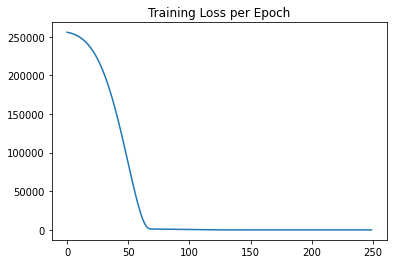

In [36]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [38]:
model.metrics_names

['loss']

In [44]:
# here we can get the score from the loss function that we set earlier. In this case, mean square error
test_score = model.evaluate(scaled_X_test, y_test, verbose=0)
test_score

25.027238845825195

In [45]:
training_score = model.evaluate(x=scaled_X_train, y=y_train, verbose=0)
training_score

23.757732391357422

### Further Evaluations

In [52]:
test_predictions = model.predict(scaled_X_test)

In [53]:
test_predictions

array([[405.36383],
       [623.7798 ],
       [592.3439 ],
       [572.4369 ],
       [366.67963],
       [579.3885 ],
       [515.2281 ],
       [459.21564],
       [549.4381 ],
       [447.61755],
       [612.01666],
       [549.11115],
       [419.18597],
       [408.95096],
       [651.48413],
       [437.3927 ],
       [508.58994],
       [660.2153 ],
       [662.86035],
       [565.72644],
       [334.2572 ],
       [444.93933],
       [382.59033],
       [378.8083 ],
       [566.7935 ],
       [610.83234],
       [532.5645 ],
       [427.95   ],
       [655.71985],
       [414.15533],
       [442.7319 ],
       [485.263  ],
       [438.51257],
       [682.1415 ],
       [424.83508],
       [417.77774],
       [502.05582],
       [550.6588 ],
       [509.9015 ],
       [395.4414 ],
       [618.824  ],
       [416.7061 ],
       [604.67206],
       [446.05243],
       [502.13745],
       [581.9048 ],
       [669.2616 ],
       [490.53497],
       [318.57916],
       [485.56454],


In [54]:
test_predictions = pd.Series(test_predictions.reshape(300))
test_predictions

0      405.363831
1      623.779785
2      592.343872
3      572.436890
4      366.679626
          ...    
295    529.221375
296    515.519165
297    609.879150
298    417.029419
299    410.961182
Length: 300, dtype: float32

In [57]:
pred_df = pd.DataFrame(y_test, columns=['Test Y'])
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [58]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df

,Test Y,0
0,402.296319,405.363831
1,624.156198,623.779785
2,582.455066,592.343872
3,578.588606,572.436890
4,371.224104,366.679626
...,...,...
295,525.704657,529.221375
296,502.909473,515.519165
297,612.727910,609.879150
298,417.569725,417.029419


In [59]:
pred_df.columns=['Test Y', 'Model Predictions']
pred_df

,Test Y,Model Predictions
0,402.296319,405.363831
1,624.156198,623.779785
2,582.455066,592.343872
3,578.588606,572.436890
4,371.224104,366.679626
...,...,...
295,525.704657,529.221375
296,502.909473,515.519165
297,612.727910,609.879150
298,417.569725,417.029419


Let's compare to the real test labels!

**Intrepretation:** We can see that our model's predictions are close the original values. However not perfect.

If our model's predictions are perfectly same as orignal values, we will see Perfect Straight line.

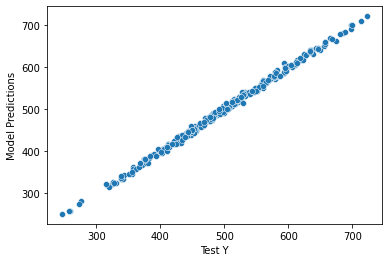

In [60]:
sns.scatterplot(x='Test Y', y='Model Predictions', data=pred_df);

------

In [79]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

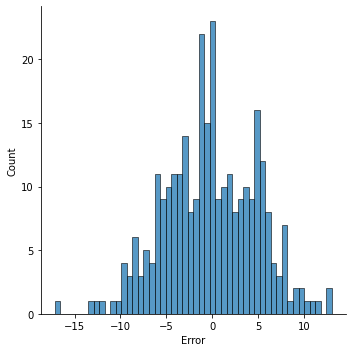

In [81]:
sns.displot(pred_df['Error'], bins=50);

---
---

## Absolute Mean Error, Mean Squared Error, Root Mean Squared Error (Other Metrics)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### How to interpret those Metrics values?

`It is important to consider the context the problem and what kind of label we are trying to predict.`

+ As we can see MAE is about 4 which means for our problem, it is about `4$` from the original Gem Stone Price.
+ If we check the `mean price` from the dataset, we can see it's about `498$`. If we calculate in this way 4/498 = 0.803 which is less than 1%. 
+ about <1% off maybe acceptable based on the problem situation.

Example: If average price is `1$` and we are off by `4$` which is 400%. Then that will be a different story.


In [77]:
mae = mean_absolute_error(pred_df['Test Y'], pred_df['Model Predictions'])
mae

4.007103121105463

In [70]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,1000.0,498.673029,93.785431,223.346793,433.025732,502.382117,564.921588,774.407854
feature1,1000.0,1000.014171,0.974018,997.058347,999.332068,1000.009915,1000.637580,1003.207934
feature2,1000.0,999.979847,0.948330,996.995651,999.316106,1000.002243,1000.645380,1002.666308


In [72]:
mse = mean_squared_error(pred_df['Test Y'], pred_df['Model Predictions'])
mse

25.02724319827358

In [75]:
import numpy as np

In [78]:
rmse = np.sqrt(mse)
rmse

5.002723578039625

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [83]:
# [[Feature1, Feature2]]
new_gem = [[998, 1000]]

In [87]:
# Don't forget to scale!
scaled_new_gem = scaler.transform(new_gem)

In [86]:
model.predict(scaled_new_gem)

array([[419.78873]], dtype=float32)

## Saving and Loading a Model

In [89]:
from tensorflow.keras.models import load_model

In [91]:
model.save('Models/my_gem_model.h5')# creates a HDF5 file 'my_model.h5'

In [92]:
later_model = load_model('Models/my_gem_model.h5')

In [93]:
later_model.predict(scaled_new_gem)

array([[419.78873]], dtype=float32)